# Import des outils / jeu de données

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

import os

In [35]:
os.getcwd()

'/home/ab2/Documents/GitHub/ab2/analyse-survie/src'

In [36]:
np.random.seed(0)
sns.set_theme()

In [37]:
df = pd.read_csv(
    "../data/kickst"
    "arter_1.csv",
    parse_dates=True,
)

# Kaplan-Meier

<Axes: xlabel='day_succ', ylabel='Count'>

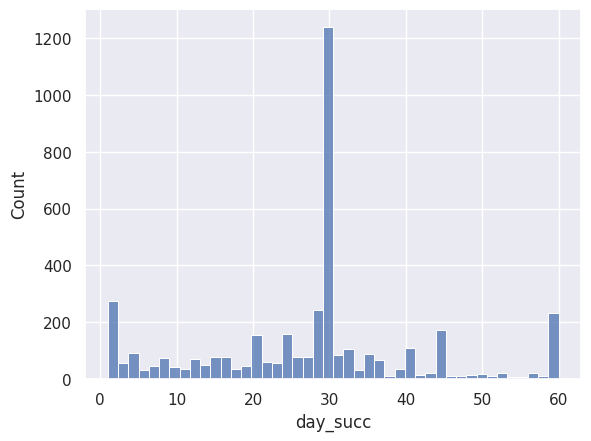

In [38]:
sns.histplot(df["day_succ"])

In [39]:
kmf = KaplanMeierFitter()

event_times = df["day_succ"]
event_observed = df["Status"]
kmf.fit(event_times, event_observed)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 4175 total observations, 2213 right-censored observations>

Text(0, 0.5, 'Probabilité')

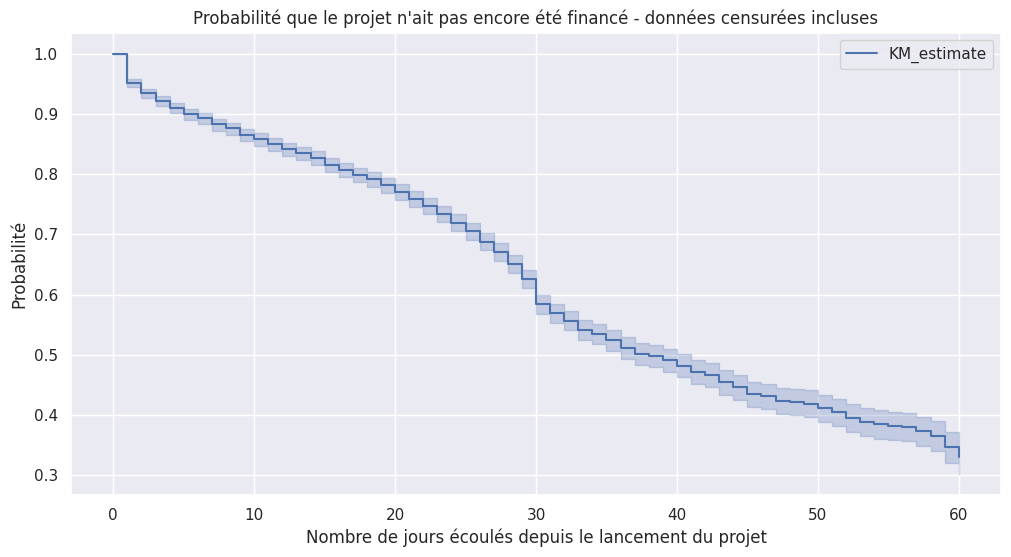

In [40]:
plt.figure(figsize=(12, 6))
kmf.plot()
plt.title("Probabilité que le projet n'ait pas encore été financé - données censurées incluses")
plt.xlabel("Nombre de jours écoulés depuis le lancement du projet")
plt.ylabel("Probabilité")

In [41]:
event_times = df["day_succ"][df["Status"] == 1]
event_observed = df["Status"][df["Status"] == 1]

kmf.fit(event_times, event_observed)


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1962 total observations, 0 right-censored observations>

Text(0, 0.5, 'Probabilité')

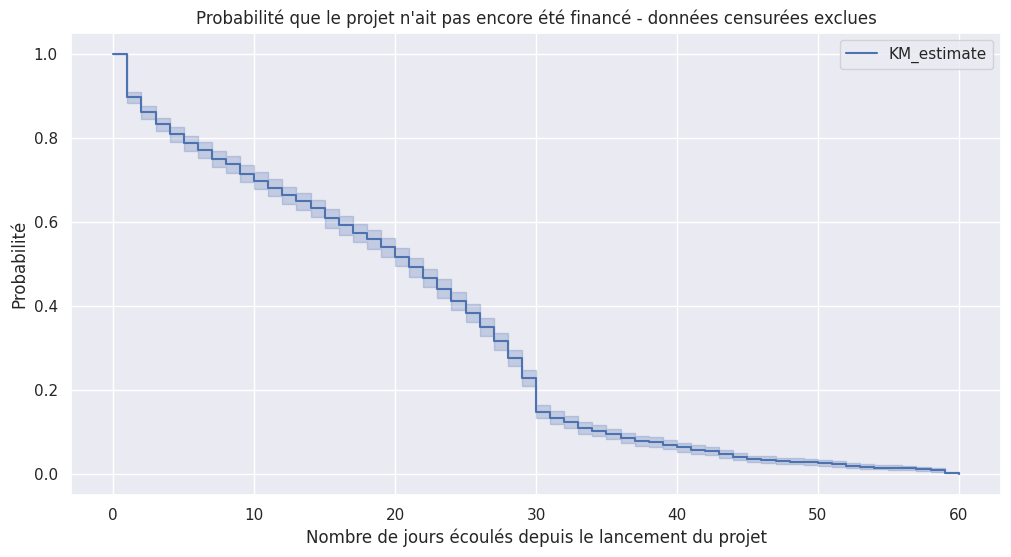

In [42]:
plt.figure(figsize=(12, 6))
kmf.plot()
plt.title("Probabilité que le projet n'ait pas encore été financé - données censurées exclues")
plt.xlabel("Nombre de jours écoulés depuis le lancement du projet")
plt.ylabel("Probabilité")

# Kaplan Meier par classe

In [43]:
df_video = df[df["has_video"] == 1].copy()
df_no_video = df[df["has_video"] == 0].copy()

Text(0, 0.5, 'Probabilité')

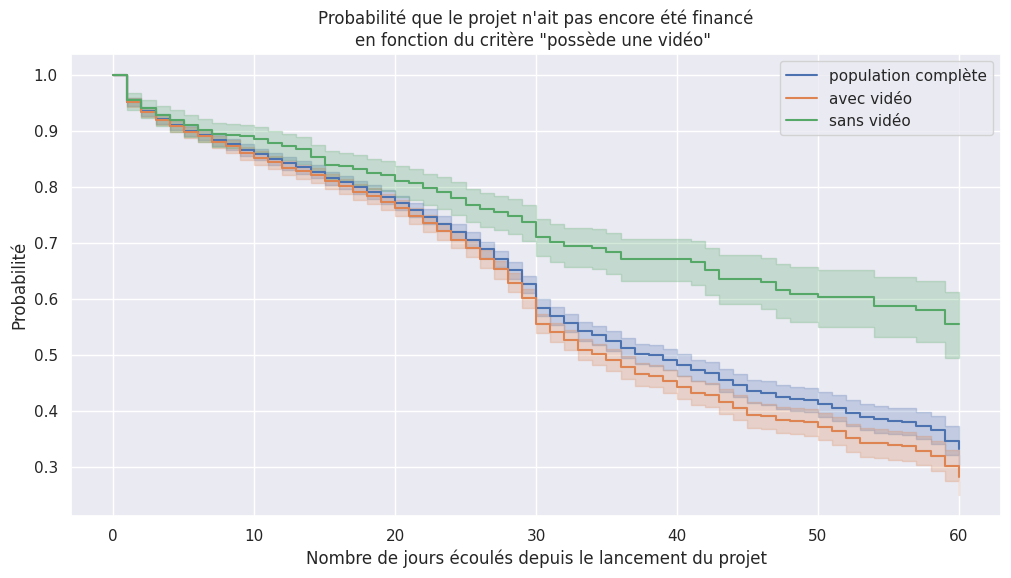

In [44]:
plt.figure(figsize=(12, 6))
kmf = KaplanMeierFitter()

event_times = df["day_succ"]
event_observed = df["Status"]
kmf.fit(event_times, event_observed)
kmf.plot_survival_function(label="population complète")


event_times = df_video["day_succ"]
event_observed = df_video["Status"]
kmf.fit(event_times, event_observed)

kmf.plot_survival_function(label="avec vidéo")


event_times = df_no_video["day_succ"]
event_observed = df_no_video["Status"]
kmf.fit(event_times, event_observed)

kmf.plot_survival_function(label="sans vidéo")

plt.title("""Probabilité que le projet n'ait pas encore été financé\nen fonction du critère "possède une vidéo" """)


plt.xlabel("Nombre de jours écoulés depuis le lancement du projet")
plt.ylabel("Probabilité")

# Expérimentation avec un petit jeu de données

In [80]:
data = [
    [1, 1],
    [2, 1],
    [3, 1],
    [7, 0],
    [10, 1],
    [11, 1]
]

In [81]:
df_test = pd.DataFrame(data, columns=["day_succ", "Status"])

In [82]:
kmf = KaplanMeierFitter()

event_times = df_test["day_succ"]
event_observed = df_test["Status"]
kmf.fit(event_times, event_observed)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 6 total observations, 1 right-censored observations>

Text(0, 0.5, 'Probabilité')

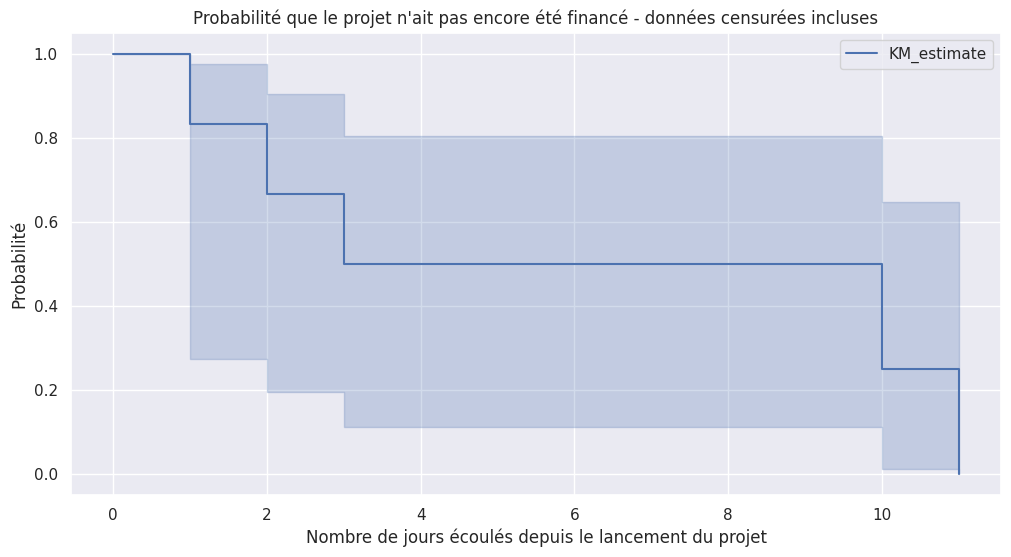

In [83]:
plt.figure(figsize=(12, 6))
kmf.plot()
plt.title("Probabilité que le projet n'ait pas encore été financé - données censurées incluses")
plt.xlabel("Nombre de jours écoulés depuis le lancement du projet")
plt.ylabel("Probabilité")

Text(0, 0.5, 'Probabilité')

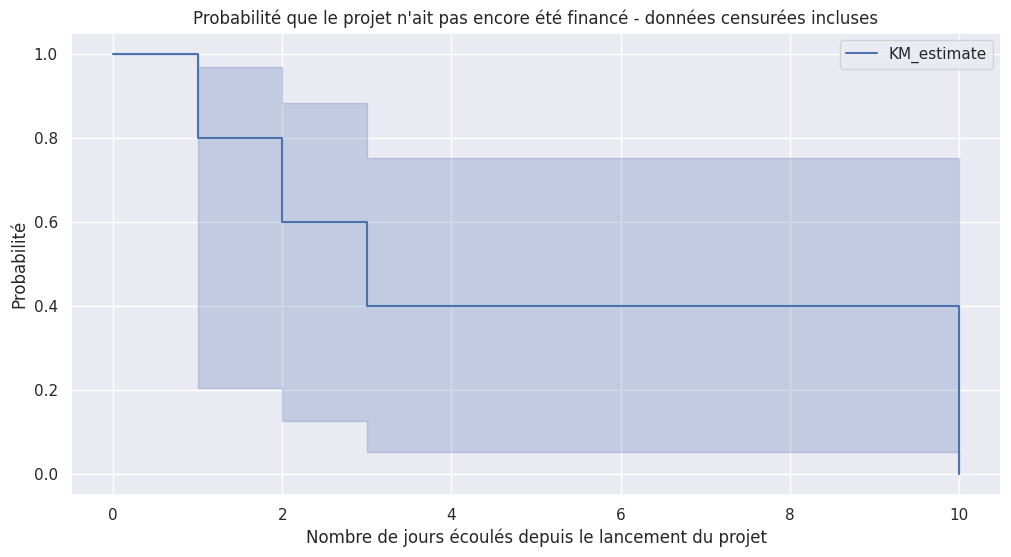

In [75]:
plt.figure(figsize=(12, 6))
kmf.plot()
plt.title("Probabilité que le projet n'ait pas encore été financé - données censurées incluses")
plt.xlabel("Nombre de jours écoulés depuis le lancement du projet")
plt.ylabel("Probabilité")

In [66]:
event_times = df_test["day_succ"][df_test["Status"] == 1]
event_observed = df_test["Status"][df_test["Status"] == 1]

kmf.fit(event_times, event_observed)


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 3 total observations, 0 right-censored observations>

Text(0, 0.5, 'Probabilité')

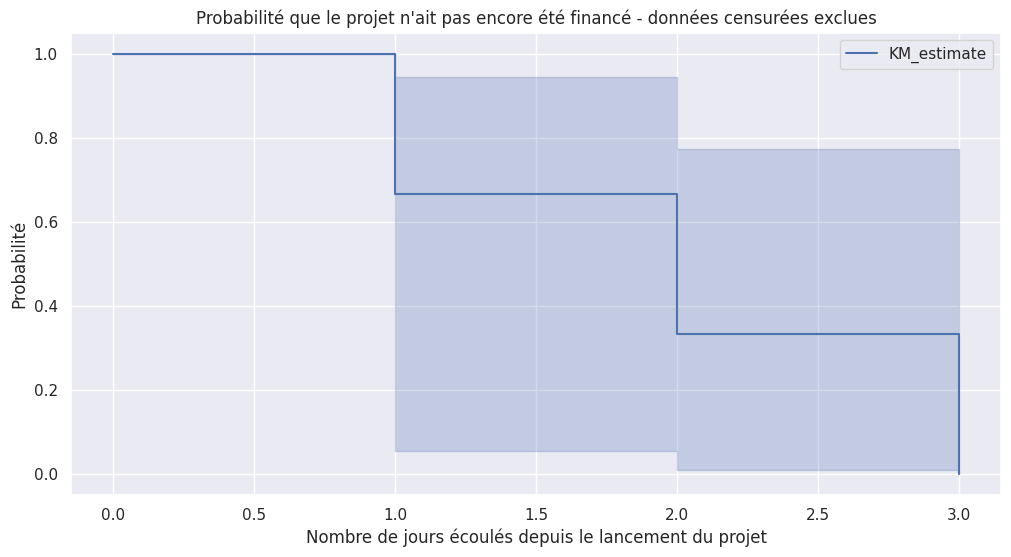

In [67]:
plt.figure(figsize=(12, 6))
kmf.plot()
plt.title("Probabilité que le projet n'ait pas encore été financé - données censurées exclues")
plt.xlabel("Nombre de jours écoulés depuis le lancement du projet")
plt.ylabel("Probabilité")

In [58]:
df["day_succ"][df["Status"] == 0]

336      4
420      6
435      6
446      6
454      7
        ..
4170    60
4171    60
4172    60
4173    60
4174    60
Name: day_succ, Length: 2213, dtype: int64

<Axes: >

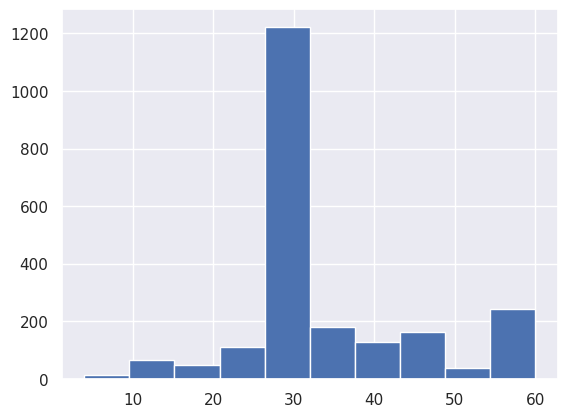

In [57]:
df["day_succ"][df["Status"] == 0].hist()

In [ ]:
df["day_succ"][df["Status"] == 1]

In [61]:
len(df.columns)

56

<Axes: >

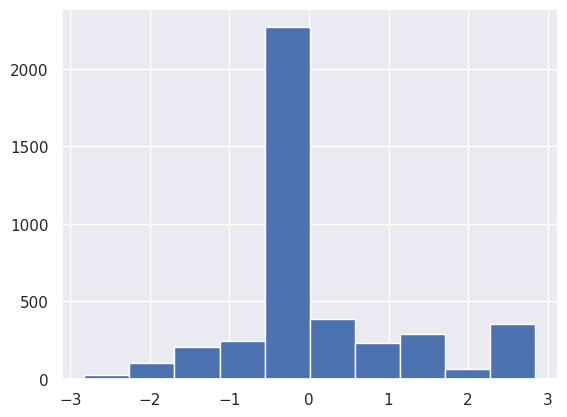

In [60]:
df["duration"].hist()